In [2]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

In [2]:
parkdata=pd.read_csv(r"../data/parkinsons.data")
# status 1 and 0

In [3]:
parkdata.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
# Split Features into X and Labels into y
X_0=parkdata.copy()
X=X_0.drop(['name','status'], axis=1)
y=parkdata[['status']]

In [6]:
y.value_counts()

status
1         147
0          48
Name: count, dtype: int64

Label 1 - Parkinson's
Label 0- Healthy

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  RPDE              195 non-null    float64
 1

Attribute Information:

Matrix column entries (attributes):
name - ASCII subject name and recording number
MDVP:Fo(Hz) - Average vocal fundamental frequency
MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
MDVP:Flo(Hz) - Minimum vocal fundamental frequency
MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency
MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
NHR,HNR - Two measures of ratio of noise to tonal components in the voice
status - Health status of the subject (one) - Parkinson's, (zero) - healthy
RPDE,D2 - Two nonlinear dynamical complexity measures
DFA - Signal fractal scaling exponent
spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation



In [8]:
# Here we define a function for cross-validation
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
def cross_validation(model, X, y, cv=5):
    '''Function to perform 5 Folds Cross-Validation
       Parameters
       ----------
      model: Python Class, default=None
              This is the machine learning algorithm to be used for training.
      _X: array
           This is the matrix of features.
      _y: array
           This is the target variable.
      _cv: int, default=5
          Determines the number of folds for cross-validation.
       Returns
       -------
       The function returns the root mean squared error
      '''
    scoring = ['accuracy','recall','f1','roc_auc']
    results = cross_validate(estimator=model,
                               X=X,
                               y=y,
                               cv=cv,
                               scoring=scoring,
                               return_train_score=True)
    return  results



### Baseline Logistic Regression classifier.

We set Logistic Regression as a baseline.

In [23]:
y=parkdata['status']
X=parkdata.drop(['name','status'],axis=1)

In [10]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=19,solver='saga',max_iter=10000,penalty='elasticnet',l1_ratio=0)
cross_validation(model,X,y,cv=10)

/home/imhaoyu/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/imhaoyu/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/imhaoyu/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/imhaoyu/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

{'fit_time': array([0.56565523, 0.53244686, 0.47570705, 0.49570751, 0.47501779,
        0.51105738, 0.50970197, 0.50483489, 0.52070928, 0.57334256]),
 'score_time': array([0.02029991, 0.01407075, 0.01587105, 0.01558495, 0.01841044,
        0.01551247, 0.02029848, 0.01945233, 0.01450467, 0.01568413]),
 'test_accuracy': array([0.85      , 0.75      , 0.85      , 0.75      , 0.85      ,
        0.94736842, 0.84210526, 0.73684211, 0.73684211, 0.73684211]),
 'train_accuracy': array([0.80571429, 0.79428571, 0.84      , 0.84      , 0.82285714,
        0.82954545, 0.84090909, 0.84659091, 0.84659091, 0.85227273]),
 'test_recall': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'train_recall': array([1.       , 1.       , 1.       , 1.       , 1.       , 1.       ,
        1.       , 1.       , 0.9924812, 1.       ]),
 'test_f1': array([0.90909091, 0.85714286, 0.90909091, 0.85714286, 0.90909091,
        0.96774194, 0.90909091, 0.84848485, 0.84848485, 0.84848485]),
 'train_f1': array([0.8859060

10-fold cross validation and the model has accuracy 0.80$\pm$0.07

### Decision Tree Algorithms
In the rest of this notebook, we are going to explore if tree algorithms can beat over the baseline. Here is a case study on XGBoost

In [13]:
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")
model=xgb.XGBClassifier(use_label_encoder=False,eval_metric='rmse')
cross_validation(model,X,y,cv=10)

{'fit_time': array([0.18977356, 0.05635619, 0.37913489, 0.04635835, 0.10560131,
        0.03929877, 0.03967023, 0.0902617 , 0.0438149 , 0.09332895]),
 'score_time': array([0.02019382, 0.01497936, 0.01605225, 0.01342344, 0.01565194,
        0.01253963, 0.01294231, 0.01322079, 0.01451612, 0.01795387]),
 'test_accuracy': array([0.85      , 0.95      , 0.8       , 0.9       , 1.        ,
        0.84210526, 0.89473684, 0.73684211, 0.89473684, 0.89473684]),
 'train_accuracy': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'test_recall': array([0.93333333, 0.93333333, 0.93333333, 1.        , 1.        ,
        0.86666667, 0.93333333, 0.92857143, 1.        , 1.        ]),
 'train_recall': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'test_f1': array([0.90322581, 0.96551724, 0.875     , 0.9375    , 1.        ,
        0.89655172, 0.93333333, 0.83870968, 0.93333333, 0.93333333]),
 'train_f1': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'test_roc_auc': array([0.93333333, 1.       

10-fold cross validation and the model has accuracy 0.87$\pm$0.07. The accuracy is better than the baseline. We are going to explain machine learning models with Shapley values next.

Here we fit the model without cross validation and provide Shapley value analysis.

### Shapley value
A prediction can be explained by assuming that each feature value of the instance is a “player” in a game where the prediction is the payout. Shapley values – a method from coalitional game theory – tells us how to fairly distribute the “payout” among the features.

The core idea behind Shapley value based explanations of machine learning models is to use fair allocation results from cooperative game theory to allocate credit for a model’s output $f(x)$ among its input features.

The interpretation of the Shapley value for feature value $j$ is: The value of the j-th feature contributed $\phi_j$ to the prediction of this particular instance compared to the average prediction for the dataset.

In [27]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=24)
for train_idx,test_idx in split.split(X,y):
    strat_train_X,strat_train_y=X.loc[train_idx],y.loc[train_idx]
    strat_test_X, strat_test_y =X.loc[test_idx], y.loc[test_idx]


In [29]:
from sklearn.metrics import precision_score, accuracy_score,recall_score
xgb_model=xgb.XGBClassifier(use_label_encoder=False,eval_metric='rmse')
xgb_model.fit(strat_train_X,strat_train_y)
y_pred=xgb_model.predict(strat_test_X)

print('precision score',precision_score(y_pred,strat_test_y))
print('accuracy score %.2f'% accuracy_score(y_pred,strat_test_y))
print('recall score %.2f'%recall_score(y_pred,strat_test_y))

precision score 1.0
accuracy score 0.92
recall score 0.91


In [30]:
import shap
shap.initjs()

In [31]:
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(strat_train_X)

In [32]:
shap.force_plot(explainer.expected_value, shap_values, strat_train_X)

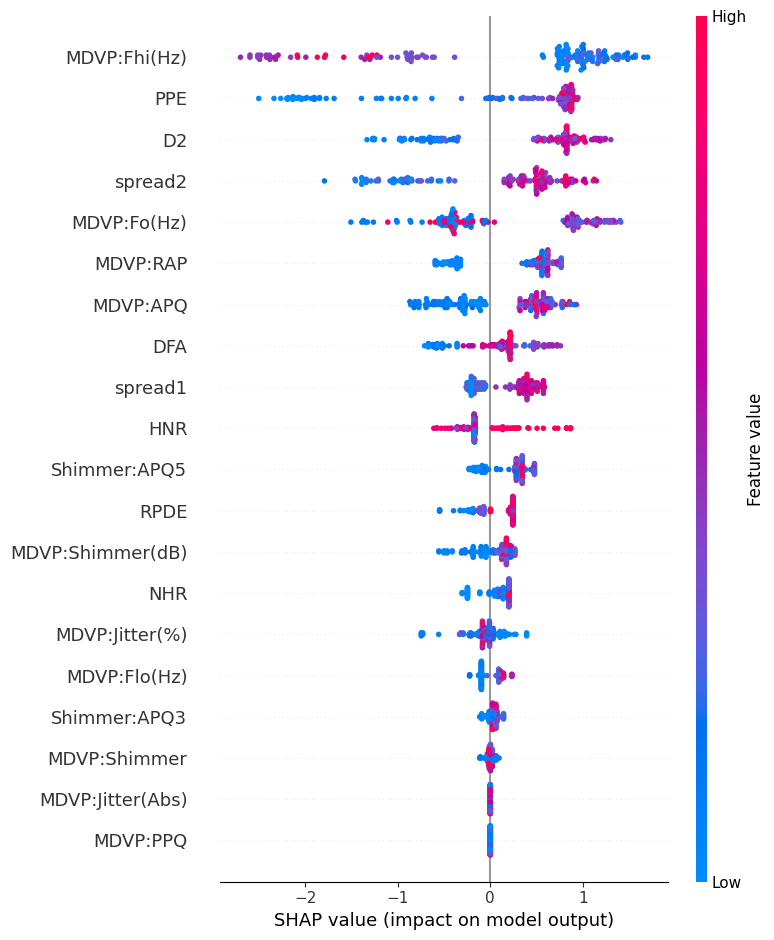

In [33]:
# summarize the effects of all the features
shap.summary_plot(shap_values, strat_train_X)

This bar plot takes the mean absolute value of each feature over all the rows the dataset (the absolute Shapley value of the plot above).

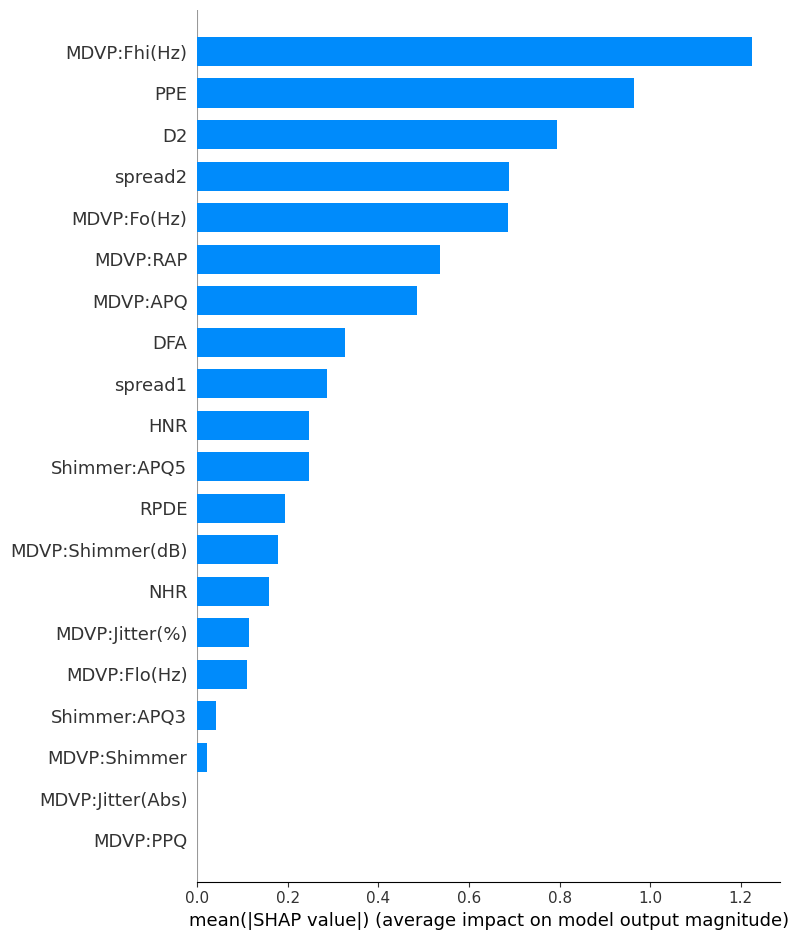

In [34]:
shap.summary_plot(shap_values, strat_train_X, plot_type="bar")

Overall, features from nonlinear measures on the sound contribute to the high predict accuracy, and maximum vocal fundamental frequency contributes the most. Features from measures of variantion in fundamental frequency are less important.